### <u> _**Time-Dependent 1D Schrödinger Equation:**_

The one dimensional time dependent Schrödinger equation written in position space for a particle of mass, $m=1$ and $\hbar = 1$ takes the form :

$$

\frac{\partial {\psi(x,t)}}{\partial {t} } = -i \hat{H}\psi(x,t)\quad \textrm{with} \; \hat{H} = -\frac{1}{2}\Delta + V(x)
$$

$\hat{H}$ is the Hamiltonian of the system. We can find the evolution of a quantum state at any given time by applying the evolution operator, this gives :

$$
\psi(x,t) = e^{-i\hat{H}t} \psi(x,0)
$$

We discretize in time and in space our quantum state, in the following manner:

$$

\psi(x_{j},t_{l}) = \psi(j \Delta x, l \Delta t ) = \psi_{j}^{l}

$$

Using a central difference method with periodic boundary conditions we obtain the following form for the Hamiltonian: 

$$

\hat{H}  = 

-\frac{1}{2(\Delta x)^{2} }
\begin{bmatrix}
-2 &  1 & &  & 1&  \\
 1  & -2 & 1  & &  \\
   &  1 & -2 & \ddots & \\
   &    &   \ddots & \ddots & 1\\
 1 &    &          & 1 & -2 & \\
\end{bmatrix}

+ \begin{bmatrix}
 &V_{1} & & & & \\
 & &V_{2} & & & \\
 & & & V_{3} & & \\
 & & & &\ddots & \\
 & & & & &V_{N} \\


   \end{bmatrix}

$$

Finally we obtain the following system to solve : 

$$

\psi_{j}^{l+1} = [ 1 +\frac{i \Delta t }{2(\Delta x)^{2} }
\begin{bmatrix}
-2 &  1 & &  & 1&  \\
1  & -2 & 1  & &  \\
   &  1 & -2 & \ddots & \\
   &    &   \ddots & \ddots & 1\\
1   &    &          & 1 & -2 & \\
\end{bmatrix}

-i \Delta t \begin{bmatrix}
 &V_{1} & & & & \\
 & &V_{2} & & & \\
 & & & V_{3} & & \\
 & & & &\ddots & \\
 & & & & &V_{N} \\


\end{bmatrix}
]
\psi_{j}^{l}

$$

The problem of this scheme is that while it is simple, it is not unitary !! In order to conserve the norm of our wave function we would need to apply the Cayley transformation.\
In our simulation we will simply make use of the evolution operator, taking advantage of the matrix exponentiation routine implemented in SciPy.  

In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib 
plt.style.use(['ggplot'])

In [2]:
def gaussian_wavepacket(x, x0, sigma0, p0): # Gaussian Wave Packet of average momentum p0 and width sigma0
    A = (2 * np.pi * sigma0**2)**(-0.25)
    return A * np.exp(1j*p0*x - ((x - x0)/(2 * sigma0))**2)


class _1D_TDSE():

    def __init__(self,x,dx,t,dt):
        self.t = t 
        self.dt = dt 
        self.x = x 
        self.dx = dx
        self.nx = x.size
        self.nt = t.size
        self.factor = -1/(2*dx**2)
        self.psi = np.zeros((nt,nx),dtype = complex)
        self.V = None 
        self.H = None

    def create_hamiltonian(self,V = None):
        H = self.factor * (np.diag( [-2]*(self.nx),k = 0) + np.diag( [1]*(self.nx-1),k = 1) + np.diag( [1]*(self.nx-1),k = -1))

        if V is not None: 
            self.V = V 
            H +=  np.diag(self.V,k = 0)

        self.H = H
        
    
    def simulate(self,psi0):
        self.psi[0,:] = psi0
        U = scipy.linalg.expm(-1j*self.H*self.dt)
        for l in range(0,nt-1):
            self.psi[l+1,:] = np.matmul(U,self.psi[l,:])
        return self.psi

def init():
    ax1.grid(True)
    ax1.set_xlabel(r'$x$')
    psi2 = ax1.plot(x,abs(psi[0,:])**2,'k',label = r'$|\psi(x,t)|^2$' )
    re_psi =ax1.plot(x,(psi[0,:].real)**2,'b',label = r'$\Re(\psi(x,t))$')
    im_psi = ax1.plot(x,(psi[0,:].imag)**2,'g',label = r'$\Im(\psi(x,t))$')
    ax2 = ax1.twinx()
    pot = ax2.plot(x,V,'r',label = r'$V(x)$')

    lns = psi2 + re_psi + im_psi + pot
    labs = [l.get_label() for l in lns]
    fig.legend(lns,labs)

def animate_wave_function(i):
    ax1.clear()
    fig.suptitle(rf'$t ={i*dt:.1f}$')
    ax1.grid(True)
    ax1.plot(x,abs(psi[i,:])**2,'k',label = r'$|\psi(x,t)|^2$' )
    ax1.plot(x,(psi[i,:].real)**2,'b',label = r'$\Re(\psi(x,t))$')
    ax1.plot(x,(psi[i,:].imag)**2,'g',label = r'$\Im(\psi(x,t))$')

### <u> Tunneling through a barrier:</u> 


MovieWriter ffmpeg unavailable; using Pillow instead.


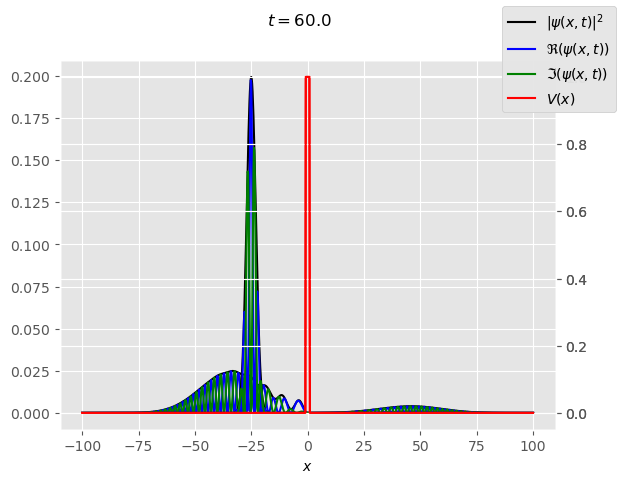

In [4]:
nx = 1001
nt = 120

t,dt = np.linspace(0,60,nt,retstep= True)
x,dx = np.linspace(-100,100,nx,retstep= True)


x0 = 0
a = 1
V0 = 1
V  = np.array([V0 if abs(x) < x0+a else 0 for x in x])

psi0 = gaussian_wavepacket(x,-25,2,1)

tunneling_simulation = _1D_TDSE(x,dx,t,dt)
tunneling_simulation.create_hamiltonian(V = V)
psi = tunneling_simulation.simulate(psi0)


fig, ax1 = plt.subplots()

tunneling_animation = animation.FuncAnimation(fig, animate_wave_function, frames=nt,init_func = init,interval=2, repeat=True)

tunneling_animation.save('tunneling_animation.gif') 

### <u> Quantum Harmonic Oscillator:</u> 

#### <u>Gaussian Wave Packet </u>

MovieWriter ffmpeg unavailable; using Pillow instead.


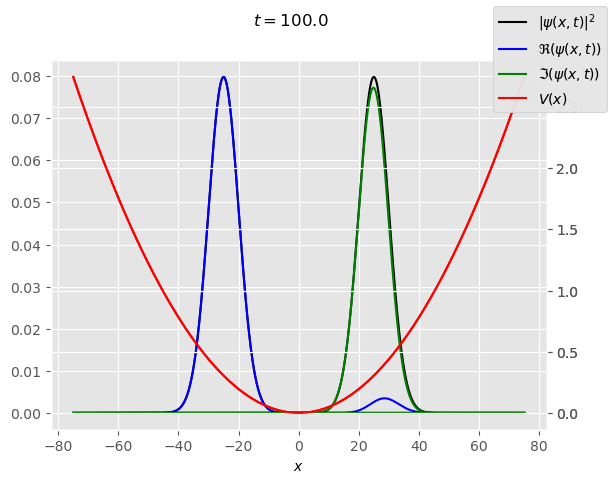

In [5]:
nx = 1001 #2001
nt = 101 #125

t,dt = np.linspace(0,100,nt,retstep= True)
x,dx = np.linspace(-75,75,nx,retstep= True)

V = 1/2*(x/32)**2 

psi0 = gaussian_wavepacket(x,-25,5,0)

harmonic_oscillator = _1D_TDSE(x,dx,t,dt)
harmonic_oscillator.create_hamiltonian(V = V)
psi = harmonic_oscillator.simulate(psi0)

fig, ax1 = plt.subplots()
harmonic_oscillator_animation = animation.FuncAnimation(fig ,animate_wave_function, frames=nt ,init_func = init ,interval=40, repeat=True)

harmonic_oscillator_animation.save('harmonic_oscillator_animation.gif') 

#### <u>Quasi-Classical or Coherent States</u>:

Expressing the free electromagnetic field in a box of size $L$ in terms of its Fourier components and normal modes we see that their behaviors are those of a harmonic oscillator. We then define conjugate canonical variables as the real and imaginary part of the normal modes of these components and impose canonical commutation relations between the two exactly the same way as for a "classic" quantum harmonic oscillator.  

This allows us to write the Hamiltonian of the free radiation as : 
$$
\hat{H} = \hbar \omega_{l} \sum_{l} ( \frac{1}{2} + \hat{a}^{\dagger}_{l}\hat{a}_{l})
$$ 
Which is the Hamiltonian of a system of $l$ decoupled harmonic oscillators. The eigenstates of the system are well known, they are the number states defined as the number of photons in mode $l$, they form an eigenbasis by iteratively operating on the vaccuum state and applying normalization:
$$
\ket{n_{l}} = \frac{(a_{l}^{\dagger})^{n}}{\sqrt{n_{l}!}}\ket{0_{l}}
$$
Interestingly it is also possible to use other quantum states when describing our system, choosing to use the eigenvectors $\ket{\alpha_{l}}$ of the anihilation operator $\hat{a}_{l}$ for example. Expanding from the natural $\set{\ket{0_{l}}\dots\ket{n_{l}}}$ basis we construct the quasi-classical or coherent states:
$$
\ket{\alpha_{l}} = \sum_{l} c_{n_{l}} \ket{n_{l}}
$$
Using the reccurence relation: 
$$
\sqrt{n_{l}} c_{n_{l}} = \alpha_{l} c_{n_{l-1}}
$$
After normalization we obtain the definition of our states: 
$$
\ket{\alpha_{l}} = e^ \frac{{-|\alpha_{l}|^{2}}}{2} \sum_{l=0}^{\infty} \frac{\alpha_{l}^{n_{l}}}{\sqrt{n_{l}!}} \ket{n_{l}}
$$

Those states, despite being a combination of the eigenstates of our system, are not eigenstates of the system and do not form an orthonormal basis. We take intereset in their representation in coordinate space.

The wavefunction $\braket{x|\alpha}$ of a coherent state $\ket{\alpha}$ is :
$$
\psi_\alpha(x) = e^{-|\alpha|^2/2} \frac{e^{-x^2/2}}{\pi^{1/4}}\sum_{n=0}^\infty \frac{\alpha^n}{\sqrt{n!}} \frac{1}{\sqrt{2^n n!}} H_k(x).
$$

with $H_k(x)$ being the k-th Hermite Polynomial coming from the wavefunctions of the states $\ket{n}$. We use the following identity:
$$
\sum_{n=0}^\infty H_n(x) \frac{t^n}{n!} = e^{2xt - t^2}
$$
Finally, by setting $t = \frac{\alpha}{\sqrt{2}}$ we obtain:
$$
\psi_\alpha(x) = \frac{1}{\pi^{1/4}}e^{\frac12(\alpha^2-|\alpha|^2)}\exp\left[-\frac12(x-\sqrt2\alpha)^2 \right]
$$

It can be shown that the average position of the coherent state is: 
$$
\langle \hat{x}(t) \rangle = \sqrt{2}|\alpha|cos(wt-\phi)
$$
It is undertaking an oscillating motion exactly like a classical particle in a harmonic potential, hence the name "quasi-classical", it can also be shown that coherent states are state of minimum quantum uncertainty. 

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: index 1001 is out of bounds for axis 0 with size 1001

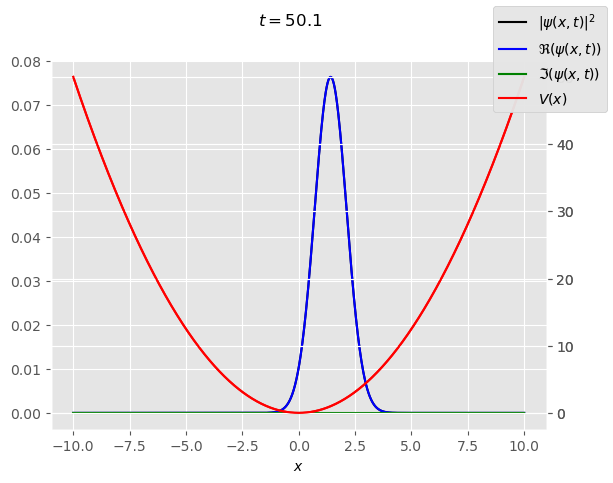

In [6]:
def coherent_state_wavefunction(x,alpha):
    prefactor = 1/(np.pi**0.25) * np.exp(1/2 * (alpha**2 + abs(alpha)**2))
    res = prefactor * np.exp(-1/2 * (x-np.sqrt(2)*alpha)**2 ) 
    return -res /scipy.integrate.trapz(x,res.real**2+res.imag**2)

nx = 1001
nt = 1001
t,dt = np.linspace(0,50,nt,retstep = True)
x,dx = np.linspace(-10,10,nx,retstep = True)


V = 1/2 * x**2

psi0 = coherent_state_wavefunction(x,1)

coherent_state = _1D_TDSE(x,dx,t,dt)
coherent_state.create_hamiltonian(V = V)
psi = coherent_state.simulate(psi0)

fig, ax1 = plt.subplots()
coherent_state_animation = animation.FuncAnimation(fig, animate_wave_function, frames=2000 ,init_func = init, interval=40, repeat=True)

coherent_state_animation.save('coherent_state_animation.gif')